In [1]:
%load_ext rpy2.ipython

from fig_builder import TwinsFiguresData, TwinsFigures

from plotnine import *
import pandas as pd
import warnings
from glob import glob
from os.path import isfile

warnings.filterwarnings('ignore')

fig_data = TwinsFiguresData()
figs = TwinsFigures(fig_data)
SPARSE_N = 100

In [35]:
raw_piles = figs.pileup('Serratia_proteamaculans', sparse=SPARSE_N)
raw_piles

,seq,pos,read_count,sample_name
26,NZ_MQMS01000019.1,700,0.99,011515_TW_B
126,NZ_MQMS01000019.1,800,1.01,011515_TW_B
262,NZ_MQMS01000027.1,500,1.98,011515_TW_B
362,NZ_MQMS01000027.1,600,1.37,011515_TW_B
462,NZ_MQMS01000027.1,700,2.53,011515_TW_B
...,...,...,...,...
19601,NZ_MQMT01000007.1,23200,0.85,IIIF6SW
19720,NZ_MQMT01000007.1,23400,0.89,IIIF6SW
19819,NZ_MQMT01000008.1,189700,0.77,IIIF6SW
19879,NZ_MQMT01000008.1,189800,0.61,IIIF6SW


In [3]:
def parse_pileup(filename):
    tbl = pd.read_csv(filename, sep='\t', names=['seq', 'pos', 'ref_base', 'read_count', 'read_results', 'quality'])
    sname = filename.split('/')[-1].split('.')[0]
    tbl['sample_name'] = sname
    return tbl

def sparse_parse_pileup(filename, N=100):
    tbl = pd.read_csv(filename, sep='\t', names=['seq', 'pos', 'ref_base', 'read_count', 'read_results', 'quality'])
    tbl = tbl.set_index(['seq', 'pos']).rolling(N, center=True).mean()
    tbl = tbl.dropna()
    tbl = tbl.reset_index()
    tbl = tbl.query('pos % @N == 0')
    tbl['pos'] = tbl['pos'] / N
    sname = filename.split('/')[-1].split('.')[0]
    tbl['sample_name'] = sname
    return tbl

CACHE_FNAME = 'cache_piles_serratia_proteamaculans.csv'
if False and isfile(CACHE_FNAME):
    raw_piles = pd.read_csv(CACHE_FNAME, index_col=0)
else:
    raw_piles = pd.concat([sparse_parse_pileup(fname, N=SPARSE_N) for fname in glob('strains/serratia_proteamaculans/*.pileup')])
    raw_piles.to_csv(CACHE_FNAME)
    
raw_piles

ValueError: No objects to concatenate

In [4]:
raw_piles['sample_name'].unique()

array(['011515_TW_B', '011515_TW_S', '012015_HR_B', '012015_HR_S',
       '012016_HR_B', '012016_HR_S', '012715_TW_B', '012715_TW_S',
       '030116_TW_B', '030116_TW_S', '040616_TW_B', '040616_TW_S',
       '041015_TW_B', '041015_TW_S', '050616_HR_B', '050616_HR_S',
       '061115_TW_B', '061115_TW_S', '061416_TW_S', '071716_HR_B',
       '071716_HR_S', '073015_HR_B', '073015_HR_S', '082916_HR_B',
       '082916_HR_S', '091115_TW_S', '100215_HR_S', '120314_HR_B',
       '120314_HR_S', '121015_TW_B', 'MHV-HR2_S41666347',
       'MHV-HR3_S41658400', 'MHV-HR4_S41677053', 'MHV-HR5_S41659407',
       'MHV-HR6_S41664399', 'MHV-HR7_S41668198', 'MHV-HR8_S41669183',
       'MHV-HR9_S41667391', 'MHV-TW1_S41667392', 'MHV-TW2_S41668201',
       'MHV-TW3_S41666352', 'MHV-TW4_S41665304', 'MHV-TW5_S41659412',
       'MHV-TW6_S41671226', 'MHV-TW7_S41665306', 'MHV-TW8_S41663403',
       'MHV-TW9_S41659413', 'MHV-twin-1_S41658395',
       'MHV-twin-2_S41673132', 'MHV-twin-3_S41658396',
       'MHV-twin

In [5]:
fig_data.metadata().apply(time_label, axis=1)

NameError: name 'time_label' is not defined

In [32]:
piles['sample_name'].unique()

array(['011515_TW_S', '012015_HR_S', '012016_HR_S', '012715_TW_S',
       '030116_TW_S', '040616_TW_S', '041015_TW_S', '050616_HR_S',
       '061416_TW_S', '071716_HR_S', '073015_HR_S', '082916_HR_S',
       '091115_TW_S', '100215_HR_S', '120314_HR_S', 'MHV-HR2_S41666347',
       'MHV-HR3_S41658400', 'MHV-HR4_S41677053', 'MHV-HR5_S41659407',
       'MHV-HR6_S41664399', 'MHV-HR7_S41668198', 'MHV-HR8_S41669183',
       'MHV-HR9_S41667391', 'MHV-TW1_S41667392', 'MHV-TW2_S41668201',
       'MHV-TW3_S41666352', 'MHV-TW4_S41665304', 'MHV-TW5_S41659412',
       'MHV-TW6_S41671226', 'MHV-TW7_S41665306', 'MHV-TW8_S41663403',
       'MHV-TW9_S41659413', 'IIF3SW', 'HEPA', 'IF3SW', 'IF5SW', 'IG4SW_P',
       'IIG1SW', 'IF1SW', 'IIG1SW_P', 'IIG7SW_P', 'IIF1SW', 'IF7SW',
       'IF4SW_P', 'IIF4SW', 'IF2SW', 'IIF1SW_P', 'IF3SW_P', 'IF8SW',
       'IIF5SW', 'IF5SW_P', 'IF1SW_P', 'IIF2SW_P', 'IF7SW_P', 'IIF7SW',
       'HEPA_P', 'IG2SW', 'IIF7SW_P', 'IF2SW_P', 'IIF8SW', 'IIF3SW_P',
       'IF8SW_P', 'I

In [24]:
meta.index 061115_TW_B

Index(['011515_TW_B', '011515_TW_S', '012015_HR_B', '012015_HR_S',
       '012016_HR_B', '012016_HR_S', '012715_TW_B', '012715_TW_S',
       '030116_TW_B', '030116_TW_S', '040616_TW_B', '040616_TW_S',
       '041015_TW_B', '041015_TW_S', '050616_HR_B', '050616_HR_S',
       '061416_TW_S', '071716_HR_B', '071716_HR_S', '073015_HR_B',
       '073015_HR_S', '082916_HR_B', '082916_HR_S', '090816_TW_S',
       '091115_TW_S', '100215_HR_S', '120314_HR_B', '120314_HR_S',
       '121015_TW_B', '121015_TW_S', 'MHV-HR1_S41667382', 'MHV-HR2_S41666347',
       'MHV-HR3_S41658400', 'MHV-HR4_S41677053', 'MHV-HR5_S41659407',
       'MHV-HR6_S41664399', 'MHV-HR7_S41668198', 'MHV-HR8_S41669183',
       'MHV-HR9_S41667391', 'MHV-TW1_S41667392', 'MHV-TW2_S41668201',
       'MHV-TW3_S41666352', 'MHV-TW4_S41665304', 'MHV-TW5_S41659412',
       'MHV-TW6_S41671226', 'MHV-TW7_S41665306', 'MHV-TW8_S41663403',
       'MHV-TW9_S41659413', 'IIF3SW', 'HEPA', 'IF3SW', 'IF5SW', 'IG4SW_P',
       'IIG1SW', 'IF1SW', '

011515_TW_B    (TW, before)
011515_TW_S    (TW, before)
012015_HR_B    (HR, before)
012015_HR_S    (HR, before)
012016_HR_B    (HR, flight)
                   ...     
IIIF3SW          (ISS, nan)
IIIF8SW_P        (ISS, nan)
IIIF5SW_P        (ISS, nan)
IIIF3SW_P        (ISS, nan)
IIIF6SW          (ISS, nan)
Length: 100, dtype: object

In [40]:
meta = fig_data.metadata()
piles = raw_piles.copy()


def time_label(row):
    subject, flight = row['subject'], row['during_flight'] if row['during_flight'] ==  row['during_flight'] else 'unknown'
    return subject, flight
    
time_labels = meta.apply(time_label, axis=1)

def get_time_label(x):
    try:
        return time_labels[x]
    except KeyError:
        if 'TW' in x:
            return 'TW', 'unknown'
        if 'HR' in x:
            return 'HR', 'unknown'
        else:
            return 'ISS', 'unknown'
    
piles['time_label'] = piles['sample_name'].map(lambda x: get_time_label(x)[1])
piles['subject'] = piles['sample_name'].map(lambda x: get_time_label(x)[0])

piles = piles.query('sample_name in @meta.index')
piles['kind'] = piles['sample_name'].map(lambda x: meta.loc[x, 'kind'])
piles['time_label'] = pd.Categorical(
    piles['time_label'],
    categories=[
        'before',
        'flight',
        'after',
        'unknown',
    ],
    ordered=True,
)

piles['subject'] = pd.Categorical(
    piles['subject'],
    categories=[
        'TW',
        'ISS',
        'HR',
        'unknown',
    ],
    ordered=True,
)

seqs = piles.query('subject == "TW"')['seq'].value_counts() > (1 * 1000 // SPARSE_N)
seqs = set(seqs[seqs].index)
piles = piles.query('seq in @seqs')
piles = piles.query('kind != "buccal"')

piles

,seq,pos,read_count,sample_name,time_label,subject,kind
7,NZ_MQMS01000019.1,100,4.39,011515_TW_S,before,TW,saliva
107,NZ_MQMS01000019.1,200,6.01,011515_TW_S,before,TW,saliva
207,NZ_MQMS01000019.1,300,1.61,011515_TW_S,before,TW,saliva
253,NZ_MQMS01000019.1,500,1.65,011515_TW_S,before,TW,saliva
353,NZ_MQMS01000019.1,600,3.87,011515_TW_S,before,TW,saliva
...,...,...,...,...,...,...,...
18492,NZ_MQMT01000016.1,400,0.91,IIIF6SW,unknown,ISS,Surface
18606,NZ_MQMT01000016.1,600,0.93,IIIF6SW,unknown,ISS,Surface
18672,NZ_MQMT01000016.1,1400,1.83,IIIF6SW,unknown,ISS,Surface
18772,NZ_MQMT01000016.1,1500,1.47,IIIF6SW,unknown,ISS,Surface


In [ ]:
piles.groupby(('time_label', 'subject')).apply(sum_pileup)

In [44]:
def sum_pileup(tbl):
    #tbl = tbl.drop(columns=['read_results'])
    tbl = tbl.groupby(('seq', 'pos'), as_index=False).sum()
    return tbl

piles_condensed = piles.groupby(('time_label', 'subject', 'kind')).apply(sum_pileup)

piles_condensed = piles_condensed.reset_index(level=[0, 1, 2])

# N = 100
# piles_condensed = piles_condensed.set_index(['seq', 'pos', 'time_label', 'subject']).rolling(N, center=True).mean()
# piles_condensed = piles_condensed.dropna()
# piles_condensed = piles_condensed.reset_index()
# piles_condensed = piles_condensed.query('pos % @N == 0')
# piles_condensed['pos'] = piles_condensed['pos'] / N
piles_condensed = piles_condensed.query('read_count > 1')

piles_condensed

,time_label,subject,kind,seq,pos,read_count
0,before,TW,fecal,NC_009832.1,302900,1.59
1,before,TW,fecal,NC_009832.1,303000,8.01
2,before,TW,fecal,NC_009832.1,303100,7.66
3,before,TW,fecal,NC_009832.1,303200,5.04
7,before,TW,fecal,NC_009832.1,341200,2.00
...,...,...,...,...,...,...
20119,unknown,ISS,Surface,NZ_WBKI01000021.1,100,913.43
20120,unknown,ISS,Surface,NZ_WBKI01000021.1,200,1802.01
20121,unknown,ISS,Surface,NZ_WBKI01000021.1,300,2120.47
20122,unknown,ISS,Surface,NZ_WBKI01000021.1,400,1427.25


In [33]:
piles_condensed['subject'].unique()

[TW, HR]
Categories (2, object): [TW < HR]

In [8]:
foo = piles_condensed.copy()
foo['foo'] = foo['seq'] + foo['pos'].map(str)
foo.query('subject == "TW"').groupby('subject').apply(lambda t: t['foo'].nunique())

subject
TW         942
ISS          0
HR           0
unknown      0
dtype: int64

In [9]:
foo.query('subject == "TW"').groupby('time_label').apply(lambda t: t['foo'].nunique())

time_label
before     825
flight     844
after      842
unknown    686
dtype: int64

In [10]:
1500 / (292*100)

0.05136986301369863

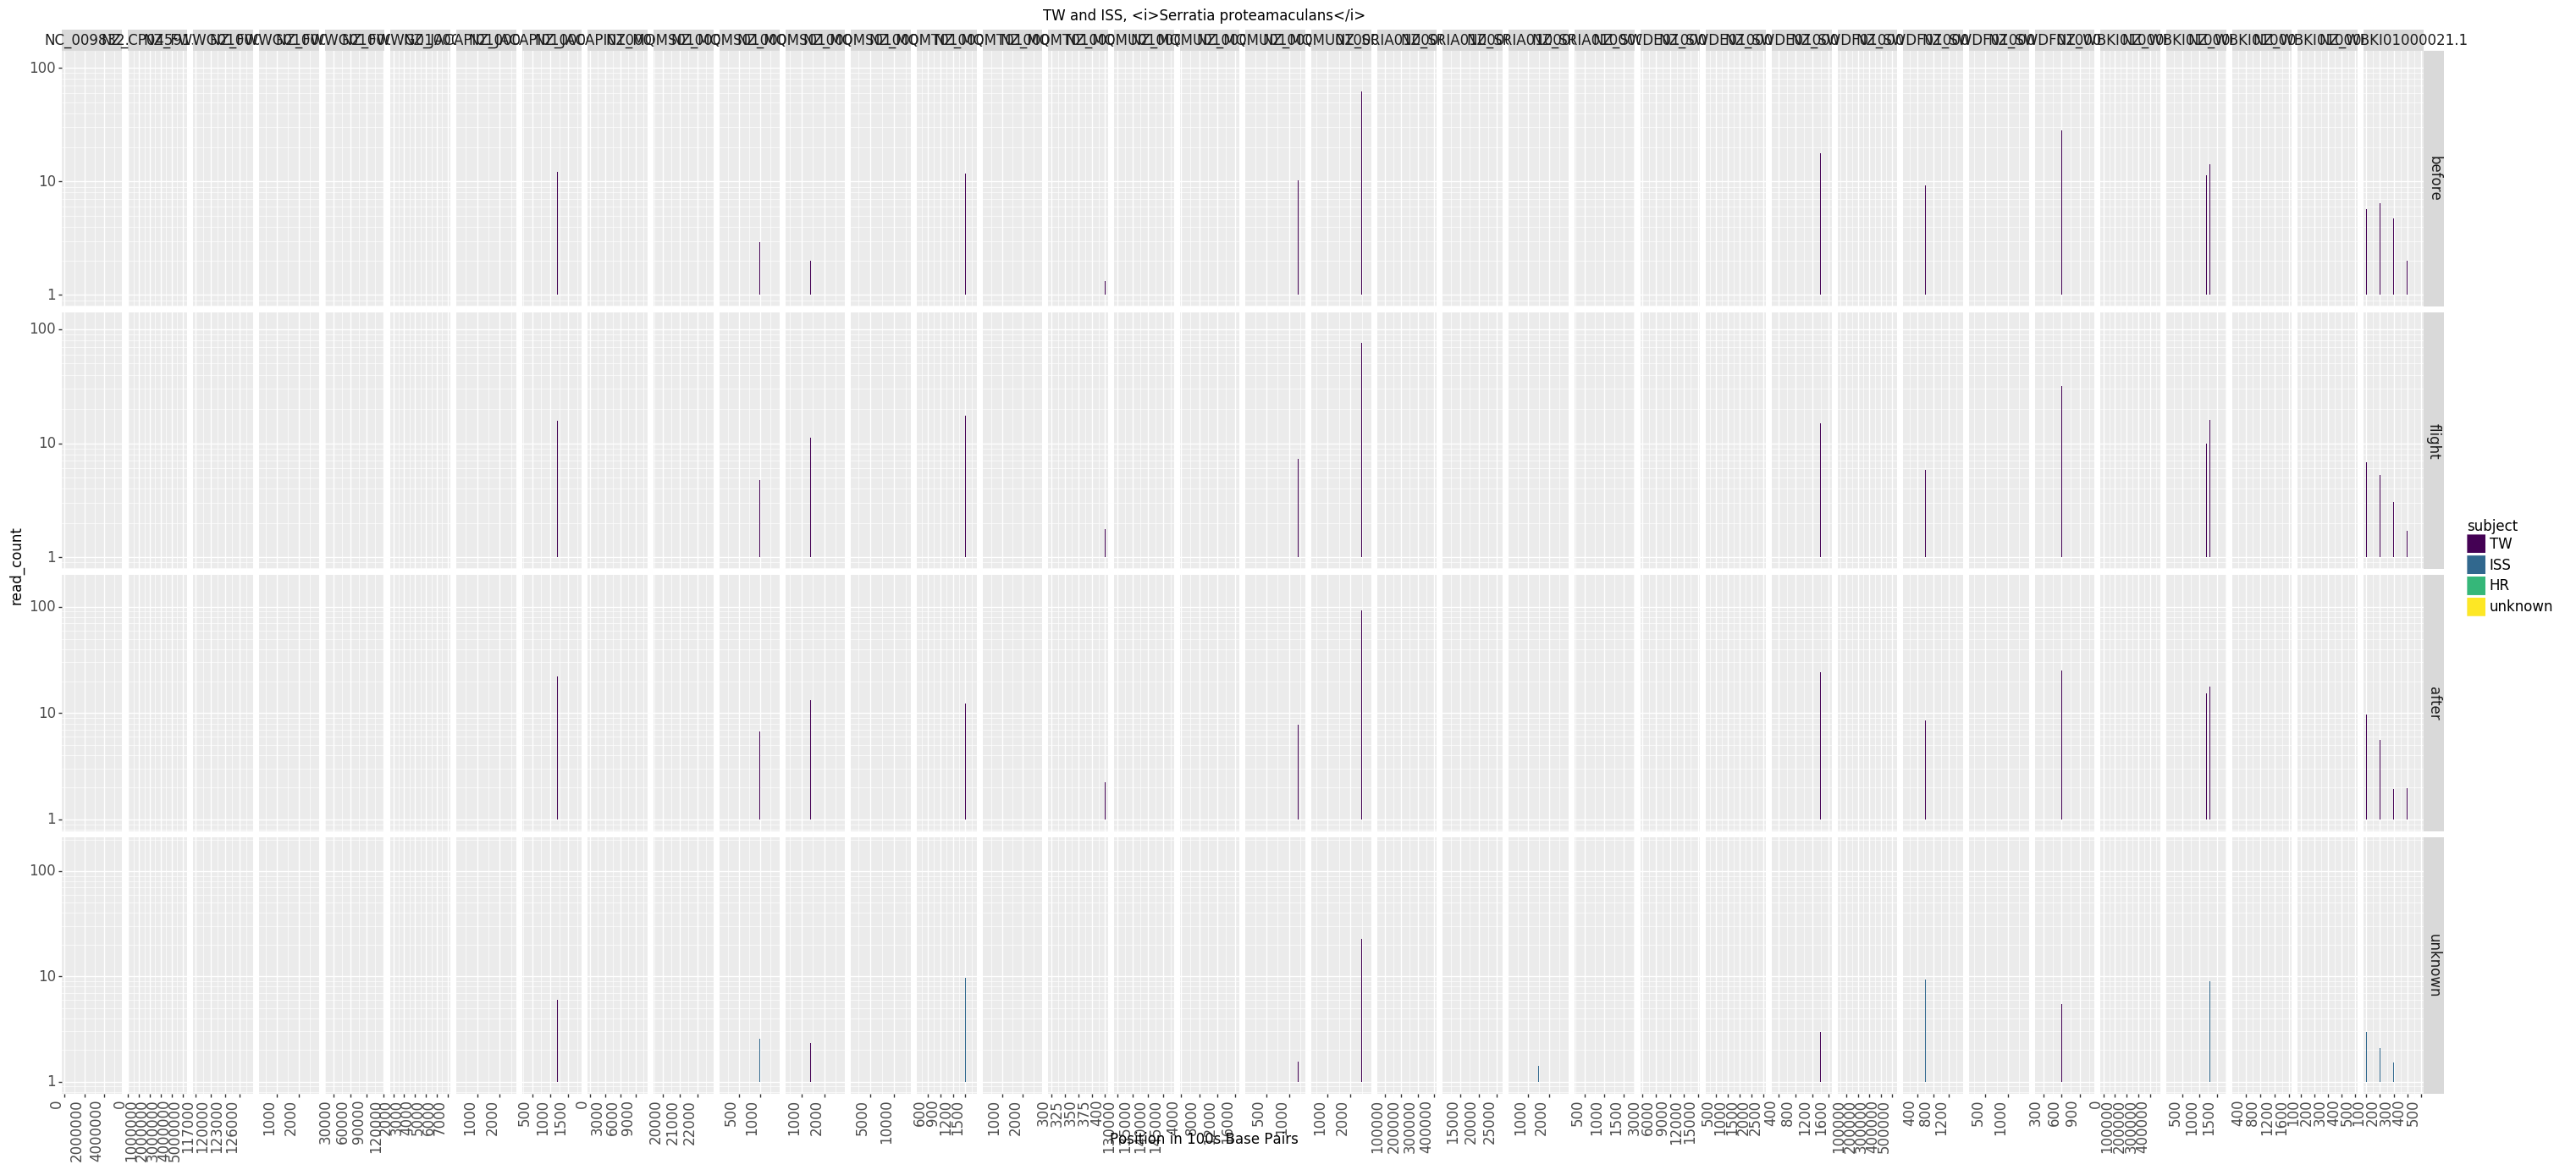

<ggplot: (-9223363286482182996)>

In [11]:
subs = ['TW', 'ISS']
t = piles_condensed.query('subject in @subs')
(
    ggplot(t, aes(x='pos', y='read_count', fill='subject')) +
        facet_grid('time_label~seq', scales='free') +
        geom_col(position='dodge') +
        scale_y_log10() +
        ggtitle('TW and ISS, <i>Serratia proteamaculans</i>') +
        xlab(f'Position in {SPARSE_N}s Base Pairs') +
        theme(
            text=element_text(size=12),
            axis_text_x=element_text(angle=90, hjust=1),
            figure_size=(36, 16),
            legend_position='right',
        )
)

In [12]:
piles_condensed['seq'].unique()

array(['NC_009832.1', 'NZ_CP045913.1', 'NZ_FWWG01000034.1',
       'NZ_FWWG01000061.1', 'NZ_JACAPI010000018.1',
       'NZ_JACAPI010000021.1', 'NZ_MQMS01000019.1', 'NZ_MQMS01000027.1',
       'NZ_MQMT01000016.1', 'NZ_MQMT01000020.1', 'NZ_MQMT01000031.1',
       'NZ_MQMU01000010.1', 'NZ_MQMU01000017.1', 'NZ_MQMU01000045.1',
       'NZ_MQMU01000047.1', 'NZ_SRIA01000022.1', 'NZ_SRIA01000025.1',
       'NZ_SRIA01000026.1', 'NZ_SWDE01000012.1', 'NZ_SWDE01000015.1',
       'NZ_SWDE01000016.1', 'NZ_SWDF01000015.1', 'NZ_SWDF01000016.1',
       'NZ_SWDF01000018.1', 'NZ_WBKI01000003.1', 'NZ_WBKI01000015.1',
       'NZ_WBKI01000016.1', 'NZ_WBKI01000019.1', 'NZ_WBKI01000021.1',
       'NZ_FWWG01000017.1', 'NZ_FWWG01000075.1', 'NZ_JACAPI010000024.1',
       'NZ_MQMS01000013.1', 'NZ_MQMS01000032.1', 'NZ_SRIA01000004.1',
       'NZ_SWDF01000003.1', 'NZ_WBKI01000006.1'], dtype=object)

In [45]:
subs = ['TW', 'ISS']
t = piles_condensed.query('subject in @subs')
seqs = ['NZ_SRIA01000026.1', 'NZ_SWDF01000018.1', 'NZ_SRIA01000025.1']
t = t.query('seq in @seqs')
t['time_label'] = t['time_label'].map(lambda x: 'ISS' if x == 'unknown' else x)
t['time_label'] = pd.Categorical(
    t['time_label'],
    categories=[
        'before',
        'flight',
        'after',
        'ISS',
    ],
    ordered=True,
)
t['subject'] = t['subject'].map(str)
t['subject'] = pd.Categorical(
    t['subject'],
    categories=[
        'TW',
        'ISS',
    ],
    ordered=True,
)


t

,time_label,subject,kind,seq,pos,read_count
155,before,TW,fecal,NZ_SRIA01000025.1,2100,2.00
156,before,TW,fecal,NZ_SRIA01000025.1,2200,2.02
157,before,TW,fecal,NZ_SRIA01000025.1,2300,1.03
158,before,TW,fecal,NZ_SRIA01000025.1,2400,3.02
159,before,TW,fecal,NZ_SRIA01000025.1,2500,8.53
...,...,...,...,...,...,...
18708,ISS,ISS,Surface,NZ_SWDF01000018.1,1000,3344.29
18709,ISS,ISS,Surface,NZ_SWDF01000018.1,1100,3149.95
18710,ISS,ISS,Surface,NZ_SWDF01000018.1,1200,1323.98
18711,ISS,ISS,Surface,NZ_SWDF01000018.1,1300,1315.20


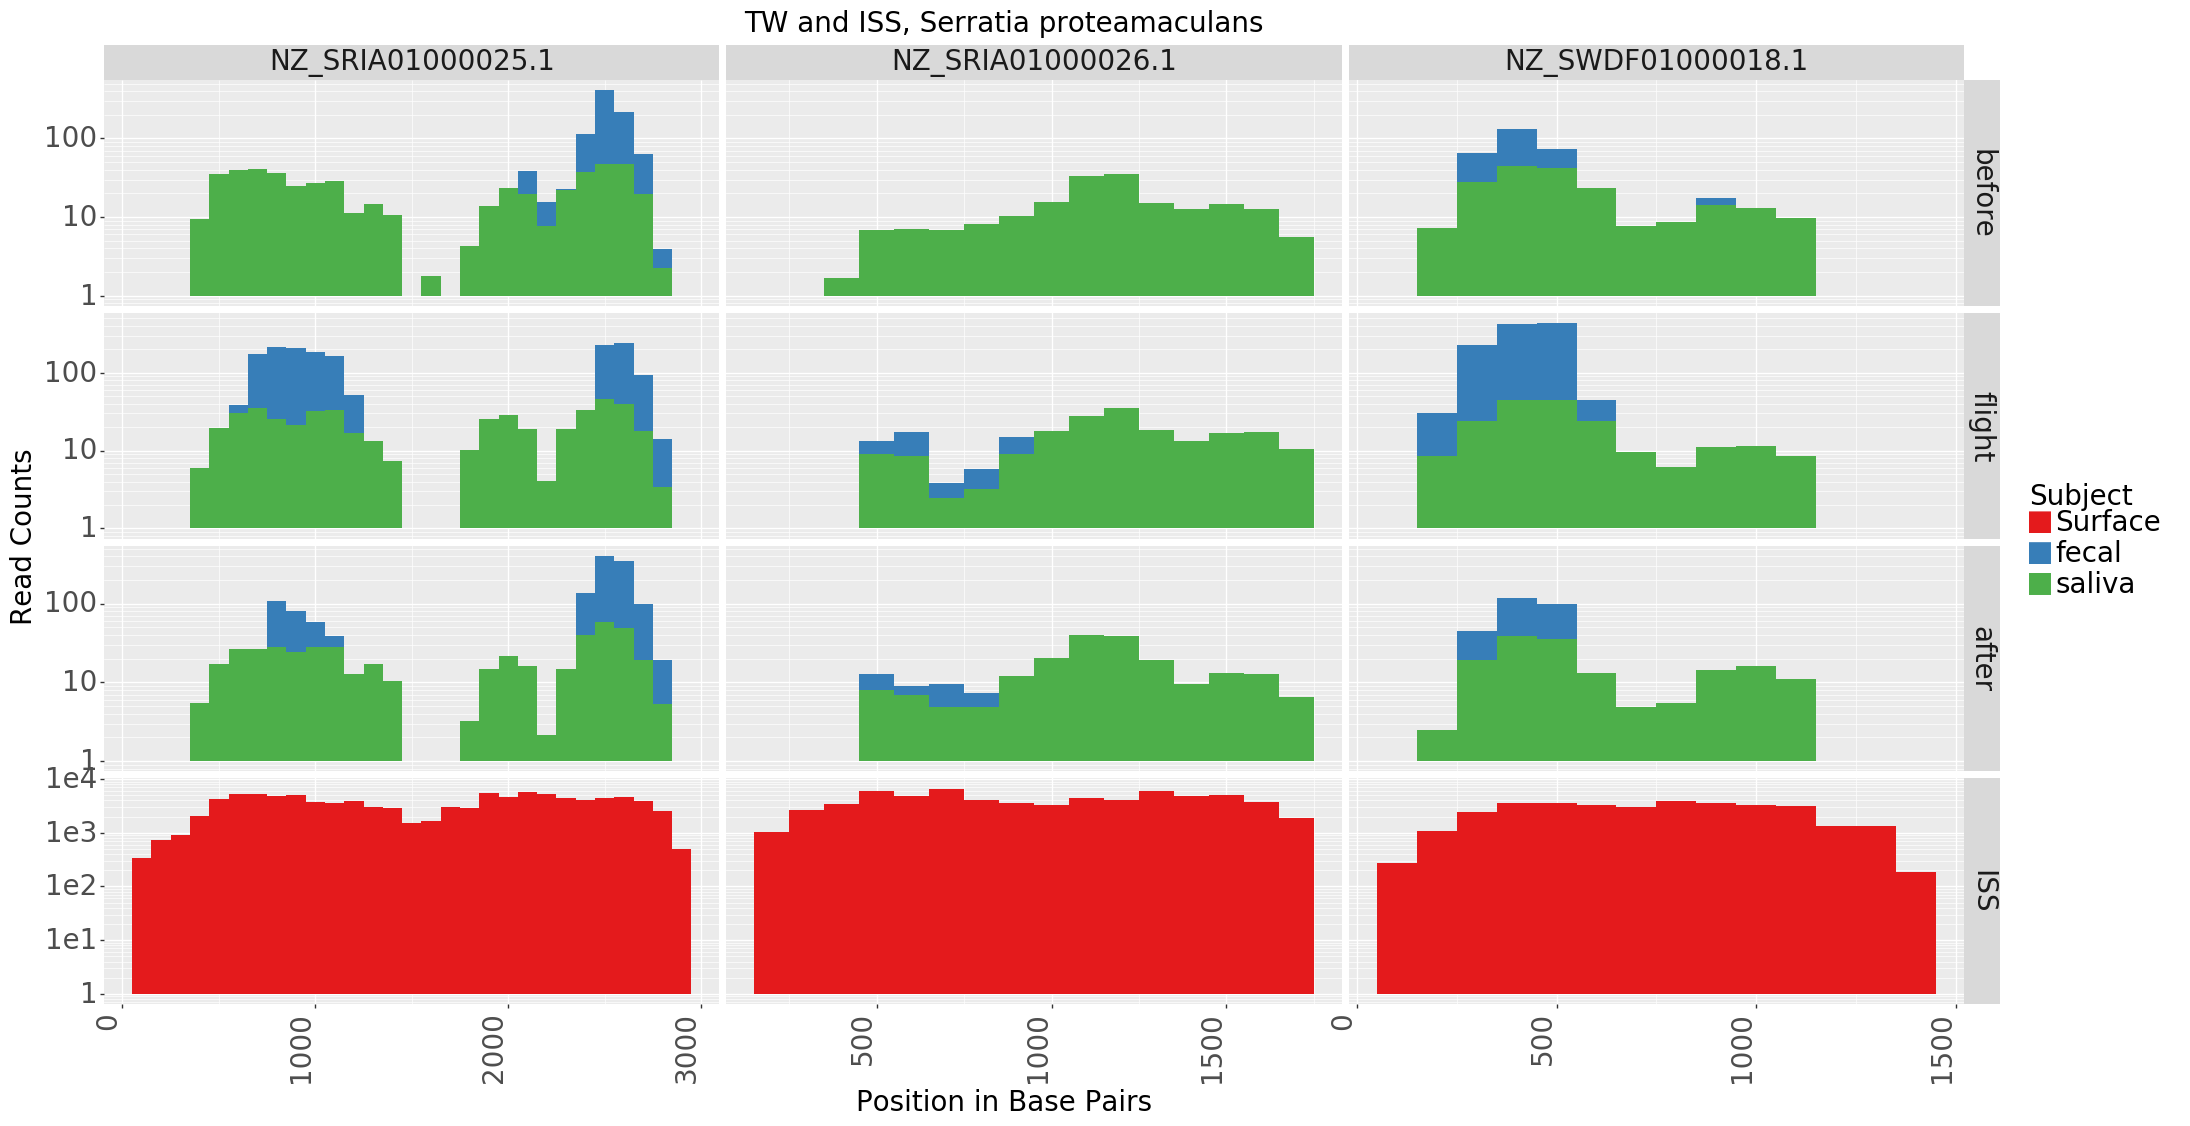

<ggplot: (-9223363286483077232)>

In [49]:
subs = ['TW', 'ISS']
t = piles_condensed.query('subject in @subs')
seqs = ['NZ_SRIA01000026.1', 'NZ_SWDF01000018.1', 'NZ_SRIA01000025.1']
t = t.query('seq in @seqs')
t['time_label'] = t['time_label'].map(lambda x: 'ISS' if x == 'unknown' else x)
t['time_label'] = pd.Categorical(
    t['time_label'],
    categories=[
        'before',
        'flight',
        'after',
        'ISS',
    ],
    ordered=True,
)
t['subject'] = t['subject'].map(str)
t['subject'] = pd.Categorical(
    t['subject'],
    categories=[
        'TW',
        'ISS',
    ],
    ordered=True,
)
t = t.query('kind != "Air"')
#t['pos'] *= 100
(
    ggplot(t, aes(x='pos', y='read_count', fill='kind')) +
        facet_grid('time_label~seq', scales='free') +
        geom_col(width=100) +
        scale_y_log10() +
        ggtitle('TW and ISS, Serratia proteamaculans') +
        xlab(f'Position in Base Pairs') +
        ylab ('Read Counts') +
        scale_fill_brewer(type='qualitative', palette=6, direction=1) +
        labs(fill='Subject') +
        theme(
            text=element_text(size=20),
            axis_text_x=element_text(angle=90, hjust=1),
            figure_size=(24, 12),
            legend_position='right',
        )
)

In [91]:
t = piles_condensed.query('subject == "HR"') #.sample(100)
(
    ggplot(t, aes(x='pos', y='read_count', fill='time_label')) +
        facet_grid('time_label~seq', scales='free') +
        geom_col(position='dodge') +
        scale_y_log10() +
        ggtitle('HR, Serratia proteamaculans') +
        xlab(f'Position in {N}s Base Pairs') +
        theme(
            text=element_text(size=12),
            axis_text_x=element_text(angle=90, hjust=1),
            figure_size=(24, 12),
            legend_position='none',
        )
)

NameError: name 'N' is not defined

In [51]:
list(figs.twins.file_source('cap2::experimental::make_pileup', f'pileup__Serratia_proteamaculans'))

[('011515_TW_B',
  '/home/dcdanko/Data/cap_tmp/011515_TW_B.cap2__experimental__make_pileup.pileup__Serratia_proteamaculans.pileup.gz'),
 ('011515_TW_S',
  '/home/dcdanko/Data/cap_tmp/011515_TW_S.cap2__experimental__make_pileup.pileup__Serratia_proteamaculans.pileup.gz'),
 ('012015_HR_B',
  '/home/dcdanko/Data/cap_tmp/012015_HR_B.cap2__experimental__make_pileup.pileup__Serratia_proteamaculans.pileup.gz'),
 ('012015_HR_S',
  '/home/dcdanko/Data/cap_tmp/012015_HR_S.cap2__experimental__make_pileup.pileup__Serratia_proteamaculans.pileup.gz'),
 ('012016_HR_B',
  '/home/dcdanko/Data/cap_tmp/012016_HR_B.cap2__experimental__make_pileup.pileup__Serratia_proteamaculans.pileup.gz'),
 ('012016_HR_S',
  '/home/dcdanko/Data/cap_tmp/012016_HR_S.cap2__experimental__make_pileup.pileup__Serratia_proteamaculans.pileup.gz'),
 ('012715_TW_B',
  '/home/dcdanko/Data/cap_tmp/012715_TW_B.cap2__experimental__make_pileup.pileup__Serratia_proteamaculans.pileup.gz'),
 ('012715_TW_S',
  '/home/dcdanko/Data/cap_tmp/0

In [53]:

def contig_parse_pileup(sample_name, filename):
    tbl = pd.read_csv(filename, sep='\t', names=['seq', 'pos', 'ref_base', 'read_count', 'read_results', 'quality'])
    tbl = tbl.query('seq == "NZ_SRIA01000025.1"')
    tbl = tbl.query('pos < 1150').query('pos > 650')
    tbl['sample_name'] = sample_name
    return tbl

CACHE_FNAME = 'cache_piles_serratia_proteamaculans_NZ_SRIA01000025.csv'
if False and isfile(CACHE_FNAME):
    contig_piles = pd.read_csv(CACHE_FNAME, index_col=0)
else:
    parsed_pileups = [contig_parse_pileup(sname, fname) for sname, fname in figs.twins.file_source('cap2::experimental::make_pileup', f'pileup__Serratia_proteamaculans')]
    parsed_pileups += [contig_parse_pileup(sname, fname) for sname, fname in figs.iss.file_source('cap2::experimental::make_pileup', f'pileup__Serratia_proteamaculans')]
    contig_piles = pd.concat(parsed_pileups)
    contig_piles.to_csv(CACHE_FNAME)
    
contig_piles

,seq,pos,ref_base,read_count,read_results,quality,sample_name
16402,NZ_SRIA01000025.1,651,N,2,AA,k>,011515_TW_B
16403,NZ_SRIA01000025.1,652,N,2,GG,k_,011515_TW_B
16404,NZ_SRIA01000025.1,653,N,2,GG,kk,011515_TW_B
16405,NZ_SRIA01000025.1,654,N,2,GG,kk,011515_TW_B
16406,NZ_SRIA01000025.1,655,N,2,AA,kk,011515_TW_B
...,...,...,...,...,...,...,...
9429,NZ_SRIA01000025.1,1145,N,1,C,B,IIIF6SW
9430,NZ_SRIA01000025.1,1146,N,1,G,B,IIIF6SW
9431,NZ_SRIA01000025.1,1147,N,1,C,<,IIIF6SW
9432,NZ_SRIA01000025.1,1148,N,1,G,7,IIIF6SW


In [54]:
piles = contig_piles.copy()
meta = fig_data.metadata()

def time_label(row):
    subject, flight = row['subject'], row['during_flight'] if row['during_flight'] ==  row['during_flight'] else 'unknown'
    return subject, flight
    
time_labels = meta.apply(time_label, axis=1)

def get_time_label(x):
    try:
        return time_labels[x]
    except KeyError:
        if 'TW' in x:
            return 'TW', 'unknown'
        if 'HR' in x:
            return 'HR', 'unknown'
        else:
            return 'ISS', 'unknown'
    
piles['time_label'] = piles['sample_name'].map(lambda x: get_time_label(x)[1])
piles['subject'] = piles['sample_name'].map(lambda x: get_time_label(x)[0])

piles = piles.query('sample_name in @meta.index')
piles['kind'] = piles['sample_name'].map(lambda x: meta.loc[x, 'kind'])

piles['time_label'] = pd.Categorical(
    piles['time_label'],
    categories=[
        'before',
        'flight',
        'after',
        'unknown',
    ],
    ordered=True,
)
piles['subject'] = pd.Categorical(
    piles['subject'],
    categories=[
        'TW',
        'ISS',
        'HR',
        'unknown',
    ],
    ordered=True,
)

piles = piles.query('subject != "HR"')
piles['read_results'] = piles['read_results'].map(lambda x: x.upper())
piles

,seq,pos,ref_base,read_count,read_results,quality,sample_name,time_label,subject,kind
16402,NZ_SRIA01000025.1,651,N,2,AA,k>,011515_TW_B,before,TW,buccal
16403,NZ_SRIA01000025.1,652,N,2,GG,k_,011515_TW_B,before,TW,buccal
16404,NZ_SRIA01000025.1,653,N,2,GG,kk,011515_TW_B,before,TW,buccal
16405,NZ_SRIA01000025.1,654,N,2,GG,kk,011515_TW_B,before,TW,buccal
16406,NZ_SRIA01000025.1,655,N,2,AA,kk,011515_TW_B,before,TW,buccal
...,...,...,...,...,...,...,...,...,...,...
9429,NZ_SRIA01000025.1,1145,N,1,C,B,IIIF6SW,unknown,ISS,Surface
9430,NZ_SRIA01000025.1,1146,N,1,G,B,IIIF6SW,unknown,ISS,Surface
9431,NZ_SRIA01000025.1,1147,N,1,C,<,IIIF6SW,unknown,ISS,Surface
9432,NZ_SRIA01000025.1,1148,N,1,G,7,IIIF6SW,unknown,ISS,Surface


In [94]:
tbl = {'TW': {}, 'ISS': {}}

In [55]:
tbl = {}
for _, row in piles.iterrows():
    key = row['sample_name'], row['pos'], row['subject'], row['time_label'], row['kind']
    tbl[key] = {}
    for char in row['read_results']:
        if char not in 'ACGT':
            continue
        tbl[key][char] = tbl[key].get(char, 0) + 1
    for char, count in tbl[key].items():
        tbl[key][char] = count / row['read_count']
        
tbl = pd.DataFrame.from_dict(tbl, orient='index').fillna(0)
tbl = tbl.reset_index()

tbl

,level_0,level_1,level_2,level_3,level_4,A,G,C,T
0,011515_TW_B,651,TW,before,buccal,1.0,0.0,0.0,0.0
1,011515_TW_B,655,TW,before,buccal,1.0,0.0,0.0,0.0
2,011515_TW_B,656,TW,before,buccal,1.0,0.0,0.0,0.0
3,011515_TW_B,657,TW,before,buccal,1.0,0.0,0.0,0.0
4,011515_TW_B,661,TW,before,buccal,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
21246,IIIF6SW,1125,ISS,unknown,Surface,0.0,0.0,0.0,1.0
21247,IIIF6SW,1129,ISS,unknown,Surface,0.0,0.0,0.0,1.0
21248,IIIF6SW,1132,ISS,unknown,Surface,0.0,0.0,0.0,1.0
21249,IIIF6SW,1137,ISS,unknown,Surface,0.0,0.0,0.0,1.0


In [57]:
tbl = {}
for _, row in piles.iterrows():
    key = row['sample_name'], row['pos'], row['subject'], row['time_label'], row['kind']
    tbl[key] = {}
    for char in row['read_results']:
        if char not in 'ACGT':
            continue
        tbl[key][char] = tbl[key].get(char, 0) + 1
    for char, count in tbl[key].items():
        tbl[key][char] = count / row['read_count']
        
tbl = pd.DataFrame.from_dict(tbl, orient='index').fillna(0)
tbl = tbl.reset_index()

tbl = tbl.groupby(['level_1', 'level_2', 'level_3', 'level_4']).mean()
tbl = tbl.reset_index()
tbl = tbl.melt(id_vars=['level_1', 'level_2', 'level_3', 'level_4'])
tbl.columns = ['pos', 'subject', 'time', 'kind', 'base', 'proportion']
tbl = tbl.query('kind != "buccal"').query('kind != "Air"')

tbl

,pos,subject,time,kind,base,proportion
1,651,ISS,unknown,Surface,A,0.998805
3,651,TW,after,saliva,A,1.000000
5,651,TW,before,fecal,A,1.000000
6,651,TW,before,saliva,A,1.000000
8,651,TW,flight,fecal,A,1.000000
...,...,...,...,...,...,...
20128,1149,ISS,unknown,Surface,T,0.000000
20130,1149,TW,after,saliva,T,0.000000
20132,1149,TW,before,saliva,T,0.000000
20134,1149,TW,flight,fecal,T,0.000000


In [58]:
iss = tbl.query('subject == "ISS"')
new_tbl = {}
for key, row in tbl.query('subject != "ISS"').iterrows():
    pos, base = row['pos'], row['base']
    prop = iss.query('pos == @pos').query('base == @base')['proportion'].iloc[0]
    row['diff'] = row['proportion'] - prop
    new_tbl[key] = row
    
new_tbl = pd.DataFrame.from_dict(new_tbl, orient='index')
new_tbl

,pos,subject,time,kind,base,proportion,diff
3,651,TW,after,saliva,A,1.0,0.001195
5,651,TW,before,fecal,A,1.0,0.001195
6,651,TW,before,saliva,A,1.0,0.001195
8,651,TW,flight,fecal,A,1.0,0.001195
9,651,TW,flight,saliva,A,1.0,0.001195
...,...,...,...,...,...,...,...
20126,1148,TW,flight,saliva,T,0.0,0.000000
20130,1149,TW,after,saliva,T,0.0,0.000000
20132,1149,TW,before,saliva,T,0.0,0.000000
20134,1149,TW,flight,fecal,T,0.0,0.000000


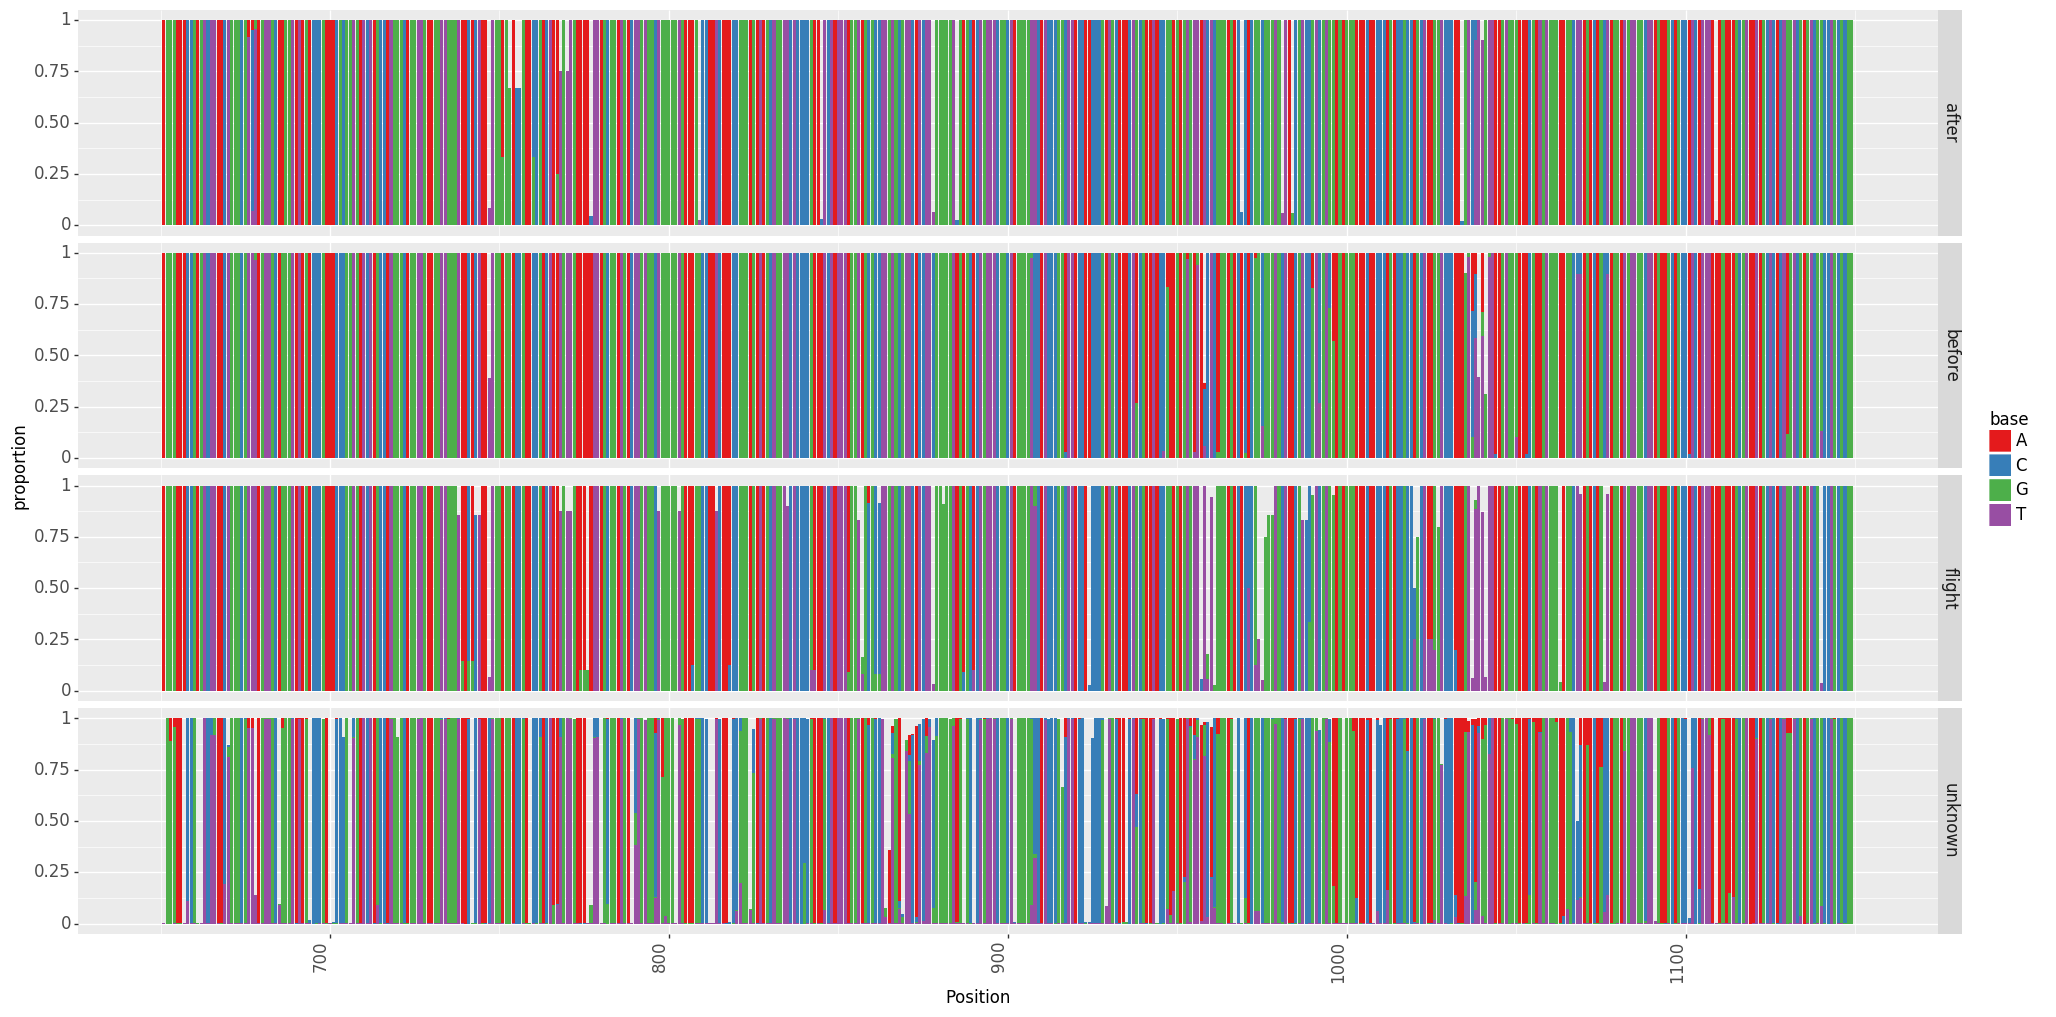

<ggplot: (-9223363286519730677)>

In [59]:
t = tbl
(
    ggplot(t, aes(x='pos', y='proportion', fill='base')) +
        facet_grid('time~.', scales='free') +
        geom_col() +
        ggtitle('') +
        xlab(f'Position') +
        scale_fill_brewer(type='qualitative', palette=6, direction=1) +
        ylim(0, 1) +
        theme(
            text=element_text(size=12),
            axis_text_x=element_text(angle=90, hjust=1),
            figure_size=(24, 12),
            legend_position='right',
        )
)

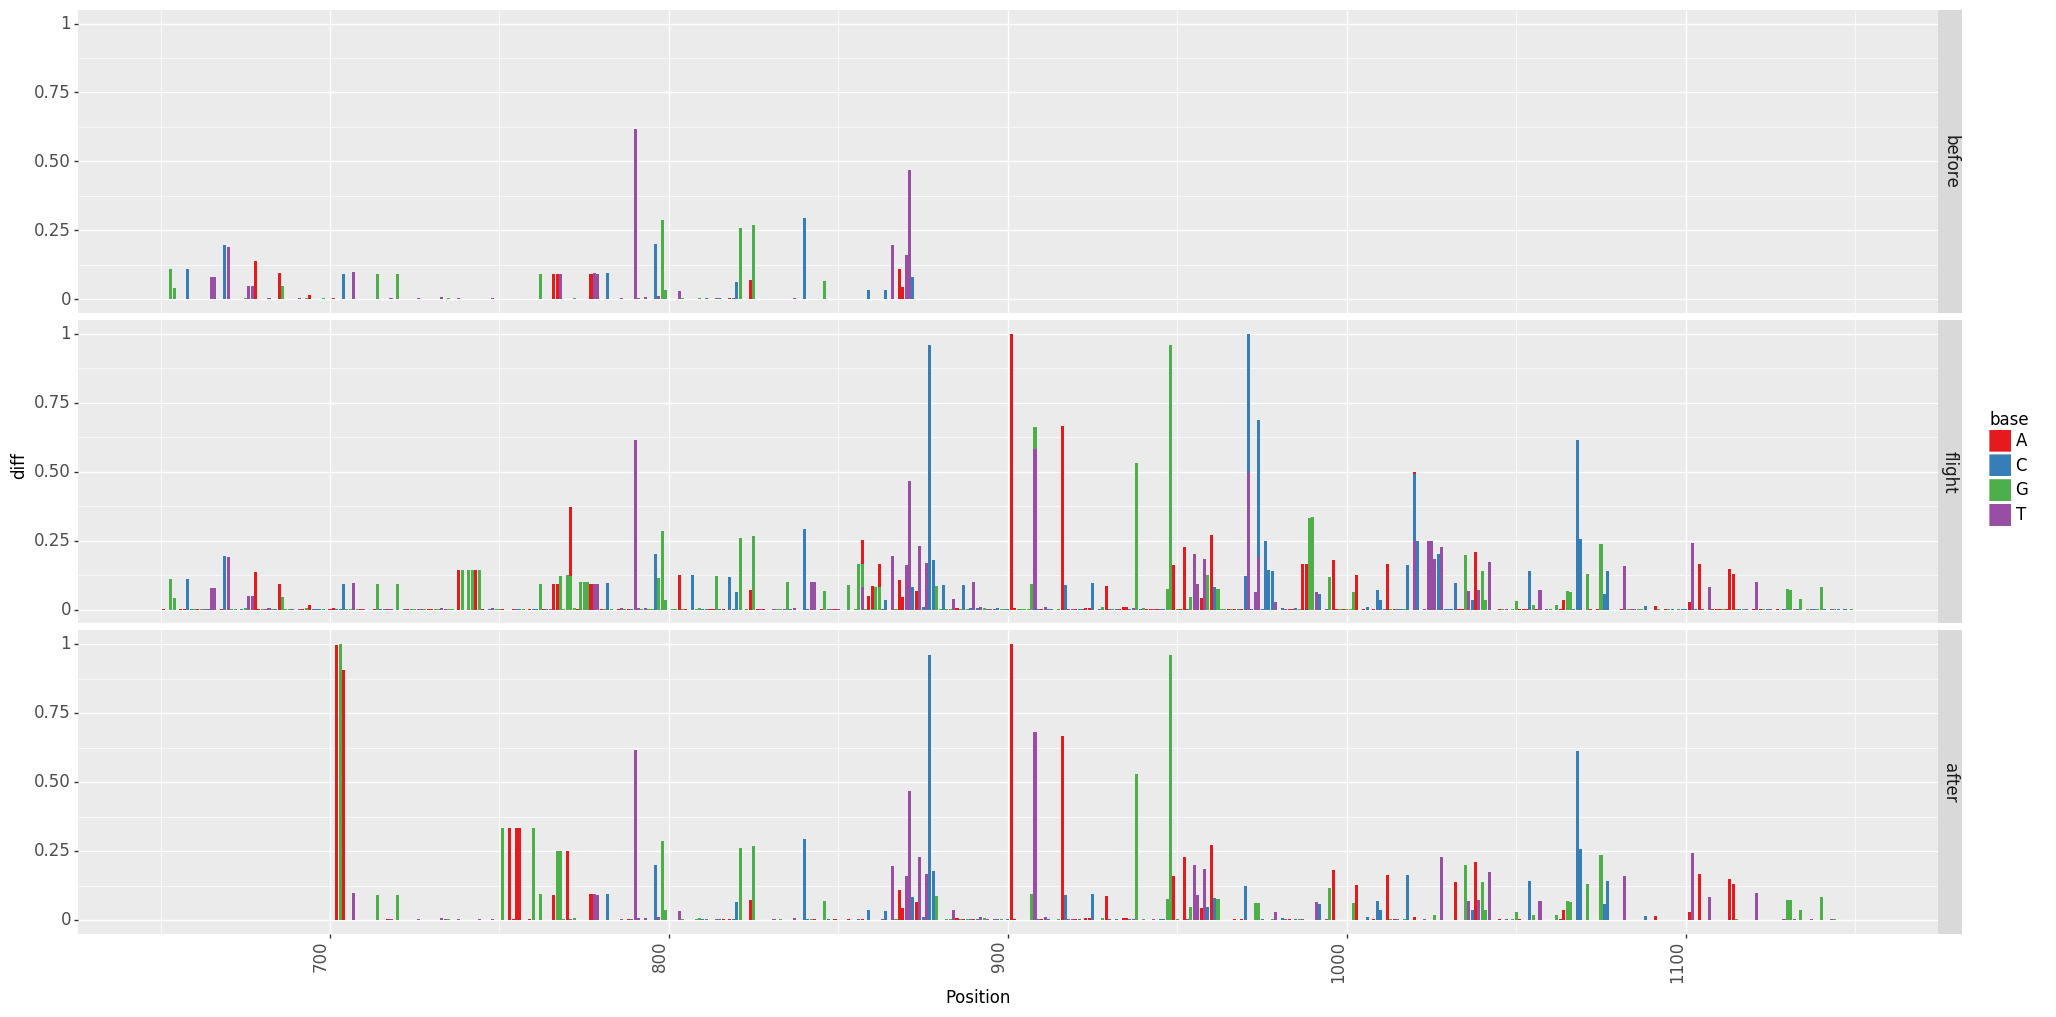

<ggplot: (8750371229027)>

In [63]:
t = new_tbl
t = t.query('kind == "fecal"')
(
    ggplot(t, aes(x='pos', y='diff', fill='base')) +
        facet_grid('time~.', scales='free') +
        geom_col() +
        ggtitle('') +
        xlab(f'Position') +
        scale_fill_brewer(type='qualitative', palette=6, direction=1) +
        ylim(0, 1) +
        theme(
            text=element_text(size=12),
            axis_text_x=element_text(angle=90, hjust=1),
            figure_size=(24, 12),
            legend_position='right',
        )
)

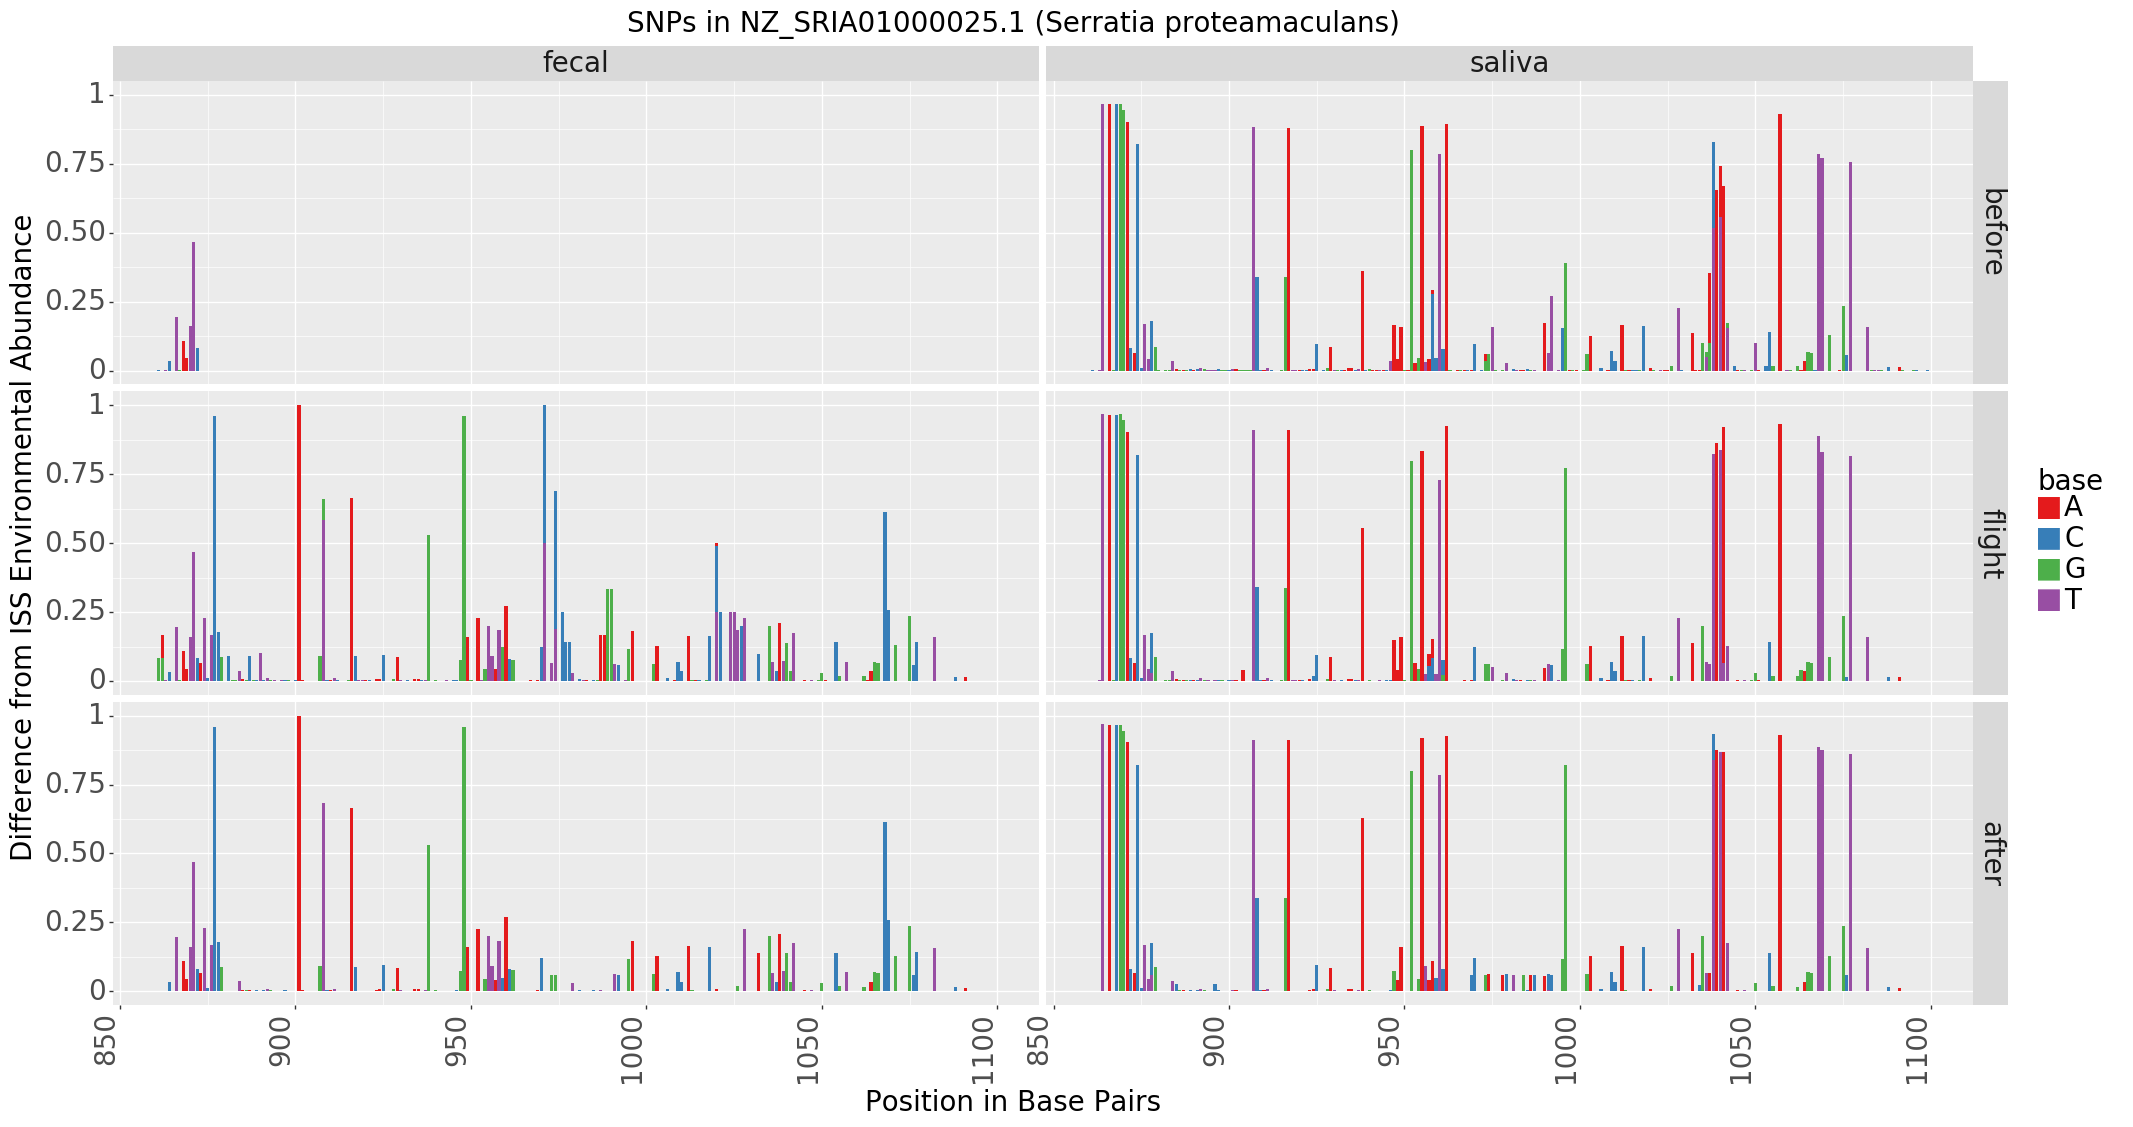

<ggplot: (8750371730054)>

In [64]:
t = new_tbl

t['time'] = pd.Categorical(
    t['time'],
    categories=[
        'before',
        'flight',
        'after',
    ],
    ordered=True,
)
(
    ggplot(t, aes(x='pos', y='diff', fill='base')) +
        facet_grid('time~kind', scales='free') +
        geom_col() +
        ggtitle('SNPs in NZ_SRIA01000025.1 (Serratia proteamaculans)') +
        xlab(f'Position in Base Pairs') +
        ylab('Difference from ISS Environmental Abundance') +
        scale_fill_brewer(type='qualitative', palette=6, direction=1) +
        ylim(0, 1) +
        xlim(860, 1100) +
        theme(
            text=element_text(size=20),
            axis_text_x=element_text(angle=90, hjust=1),
            figure_size=(24, 12),
            legend_position='right',
        )
)

In [4]:
import networkx as nx
import community
import pysam
from gimmebio.seqs import reverseComplement


def get_mismatches(rec):
    qseq = rec.get_forward_sequence().upper()
    if rec.is_reverse:
        qseq = reverseComplement(qseq)
    rseq = rec.get_reference_sequence().upper()
    for qpos, rpos in rec.get_aligned_pairs():
        if qpos == None or rpos == None:
            continue  # no indels yet
        q = qseq[qpos]
        r = rseq[rpos - rec.reference_start]
        if q != r:
            position = (rec.reference_name, rpos)
            change = (r, q)
            yield (position, change)
            
            
def filter_to_region(node):
    ((seq, coord), miss) = node
    if seq != "NZ_SRIA01000025.1":
        return False
    if coord < 850:
        return False
    if coord > 1100:
        return False
    return True

def build_graph(rec_iter, G=nx.Graph()):
    for rec in rec_iter:
        misses = list(get_mismatches(rec))
        misses = [miss for miss in misses if filter_to_region(miss)]
        for missA in misses:
            for missB in misses:
                if missA == missB:
                    break
                try:
                    w = G[missA][missB]['weight']
                except KeyError:
                    w = 0
                G.add_edge(missA, missB, weight=w + 1)
    return G


graphs = {}

def process_file(filename):
    sname = filename.split('/')[-1].split('.')[0]
    subject = get_time_label(sname)[0]
    graphs[subject] = graphs.get(subject, nx.Graph())
    graph = graphs[subject]
    bam = pysam.AlignmentFile(filename, 'rb')
    build_graph(bam, G=graph)

for bam in glob('strains/serratia_proteamaculans/*.bam'):
    print(bam)
    process_file(bam)
    
graphs

strains/serratia_proteamaculans/IIIF2SW-P-M_S479_L006.serratia_proteamaculans.sorted.bam
strains/serratia_proteamaculans/MHV-HR3_S41658400.serratia_proteamaculans.sorted.bam
strains/serratia_proteamaculans/MHV-TW4_S41665304.serratia_proteamaculans.sorted.bam
strains/serratia_proteamaculans/5812_S19_L006.serratia_proteamaculans.sorted.bam
strains/serratia_proteamaculans/5710_S7_L003.serratia_proteamaculans.sorted.bam
strains/serratia_proteamaculans/IIIF7SW-P-M_S484_L006.serratia_proteamaculans.sorted.bam
strains/serratia_proteamaculans/MHV-TW1_S41667392.serratia_proteamaculans.sorted.bam
strains/serratia_proteamaculans/MHV-twin-3_S41658396.serratia_proteamaculans.sorted.bam
strains/serratia_proteamaculans/2333_S2_L003.serratia_proteamaculans.sorted.bam
strains/serratia_proteamaculans/IIIF7SW-M_S473_L006.serratia_proteamaculans.sorted.bam
strains/serratia_proteamaculans/5813_S20_L006.serratia_proteamaculans.sorted.bam
strains/serratia_proteamaculans/5642_S10_L005.serratia_proteamaculans.

{'ISS': <networkx.classes.graph.Graph at 0x7f4b9c0b2128>,
 'HR': <networkx.classes.graph.Graph at 0x7f4bfc4f0da0>,
 'TW': <networkx.classes.graph.Graph at 0x7f4b9c0b23c8>}

In [12]:


sizes = {}
for _, c in partition.items():
    sizes[c] = sizes.get(c, 0) + 1

print('mean', sum(sizes.values()) / len(sizes))
print('median', sorted(sizes.values())[len(sizes) // 2])

mean 28.433611884865368
median 16


In [22]:
def get_node_weights(G):
    node_weights = {}
    for node in G.nodes():
        total_weight = 0
        for el in G.edges(node, data=True):
            total_weight += el[2]['weight']
        node_weights[node] = total_weight
    return node_weights


def sparse_filter_graph(G):
    G = G.copy()
    node_weights = get_node_weights(G)
    for node, w in node_weights.items():
        if w == 1:
            G.remove_node(node)
        ((seq, coord), miss) = node
        if seq != "NZ_SRIA01000025.1":
            G.remove_node(node)
        if coord < 850:
            G.remove_node(node)
        if coord > 1100:
            G.remove_node(node)
    return G

def sparse_partition(G):
    G = sparse_filter_graph(G)
    partition = community.best_partition(G)
    weights = get_node_weights(G)
    out = {}
    for k, v in partition.items():
        if weights[k] < 50:
            continue
        out[k] = (v, weights[k])
    return out

In [23]:
ps = sparse_partition(graphs['TW'])
ps

{(('NZ_SRIA01000025.1', 876), ('T', 'C')): (0, 92),
 (('NZ_SRIA01000025.1', 900), ('T', 'A')): (0, 106),
 (('NZ_SRIA01000025.1', 907), ('C', 'T')): (0, 96),
 (('NZ_SRIA01000025.1', 915), ('G', 'A')): (0, 108),
 (('NZ_SRIA01000025.1', 924), ('A', 'C')): (0, 102),
 (('NZ_SRIA01000025.1', 937), ('C', 'G')): (0, 94),
 (('NZ_SRIA01000025.1', 947), ('A', 'G')): (0, 101)}

In [24]:
iss = sparse_partition(graphs['ISS'])
iss_filt = {}
for k in ps.keys():
    iss_filt[k] = iss[k]
iss_filt

{(('NZ_SRIA01000025.1', 876), ('T', 'C')): (3, 523),
 (('NZ_SRIA01000025.1', 900), ('T', 'A')): (4, 271),
 (('NZ_SRIA01000025.1', 907), ('C', 'T')): (3, 7176),
 (('NZ_SRIA01000025.1', 915), ('G', 'A')): (3, 8426),
 (('NZ_SRIA01000025.1', 924), ('A', 'C')): (3, 13960),
 (('NZ_SRIA01000025.1', 937), ('C', 'G')): (3, 4347),
 (('NZ_SRIA01000025.1', 947), ('A', 'G')): (3, 1206)}

In [28]:
for k, (c, w) in iss.items():
    if c == 3 and w > 500:
        print(k, (c, w))

(('NZ_SRIA01000025.1', 873), ('T', 'C')) (3, 715)
(('NZ_SRIA01000025.1', 907), ('C', 'T')) (3, 7176)
(('NZ_SRIA01000025.1', 915), ('G', 'A')) (3, 8426)
(('NZ_SRIA01000025.1', 924), ('A', 'C')) (3, 13960)
(('NZ_SRIA01000025.1', 937), ('C', 'A')) (3, 8515)
(('NZ_SRIA01000025.1', 937), ('C', 'G')) (3, 4347)
(('NZ_SRIA01000025.1', 876), ('T', 'C')) (3, 523)
(('NZ_SRIA01000025.1', 947), ('A', 'G')) (3, 1206)


In [16]:
partition = community.best_partition(graphs['TW'])
sparsed_tw = {}
for ((seq, coord), miss), cluster in partition.items():
    if seq != "NZ_SRIA01000025.1":
        continue
    if coord < 850:
        continue
    if coord > 1100:
        continue
    sparsed_tw[((seq, coord), miss)] = cluster
sparsed_tw

{(('NZ_SRIA01000025.1', 884), ('A', 'T')): 157,
 (('NZ_SRIA01000025.1', 876), ('T', 'C')): 157,
 (('NZ_SRIA01000025.1', 900), ('T', 'A')): 157,
 (('NZ_SRIA01000025.1', 907), ('C', 'T')): 157,
 (('NZ_SRIA01000025.1', 915), ('G', 'A')): 157,
 (('NZ_SRIA01000025.1', 924), ('A', 'C')): 157,
 (('NZ_SRIA01000025.1', 937), ('C', 'G')): 157,
 (('NZ_SRIA01000025.1', 944), ('C', 'G')): 157,
 (('NZ_SRIA01000025.1', 947), ('A', 'G')): 157,
 (('NZ_SRIA01000025.1', 865), ('T', 'A')): 157,
 (('NZ_SRIA01000025.1', 1067), ('A', 'C')): 157,
 (('NZ_SRIA01000025.1', 1068), ('T', 'C')): 157,
 (('NZ_SRIA01000025.1', 981), ('T', 'C')): 157,
 (('NZ_SRIA01000025.1', 880), ('G', 'C')): 157,
 (('NZ_SRIA01000025.1', 856), ('A', 'T')): 157,
 (('NZ_SRIA01000025.1', 861), ('C', 'G')): 157,
 (('NZ_SRIA01000025.1', 975), ('G', 'C')): 157,
 (('NZ_SRIA01000025.1', 976), ('G', 'C')): 157,
 (('NZ_SRIA01000025.1', 977), ('G', 'C')): 157,
 (('NZ_SRIA01000025.1', 972), ('G', 'T')): 157,
 (('NZ_SRIA01000025.1', 973), ('G', 'C

In [ ]:
partition = community.best_partition(graphs['ISS'])
sparsed_iss = {}
for ((seq, coord), miss), cluster in partition.items():
    if seq != "NZ_SRIA01000025.1":
        continue
    if coord < 850:
        continue
    if coord > 1100:
        continue
    sparsed_iss[((seq, coord), miss)] = cluster
sparsed_iss

In [74]:
tbl = pd.DataFrame.from_dict({
    (31, 'e'): {'u': 29366570, 'd': 78895715},
    (31, 'h'): {'u': 90711220, 'd': 146126099},

    (21, 'e'): {'u': 22180615, 'd': 72952331},
    (21, 'h'): {'u': 71315880, 'd': 128257395},

    (18, 'e'): {'u': 18786166, 'd': 69658227},
    (18, 'h'): {'u': 61129722, 'd': 118257709},

    (16, 'e'): {'u': 14799363, 'd': 63794997},
    (16, 'h'): {'u': 47919697, 'd': 103699995},
    
    (14, 'e'): {'u': 6697027, 'd': 43164032},
    (14, 'h'): {'u': 17875574, 'd': 60848239},
    
    (12, 'e'): {'u': 16, 'd': 2096837},
    (12, 'h'): {'u': 394, 'd': 2097149},

    (11, 'e'): {'u': 0, 'd': 524800},
    (11, 'h'): {'u': 0, 'd': 524800},
    
    (10, 'e'): {'u': 0, 'd': 524800},
    (10, 'h'): {'u': 0, 'd': 524800},
    
    (8, 'e'): {'u': 0, 'd': 32896},
    (8, 'h'): {'u': 0, 'd': 32896},
    
}, orient='index')

tbl.columns = ['Unique', 'Distinct']
tbl.index = tbl.index.set_names(['k', 'kind'])
tbl['Repeated'] = tbl['Distinct'] - tbl['Unique']
tbl /= 1000 * 1000
# tbl = tbl.applymap(lambda x: int(x + 0.5))
tbl = tbl.reset_index().melt(id_vars=['k', 'kind'])


tbl.head()

,k,kind,variable,value
0,31,e,Unique,29.366570
1,31,h,Unique,90.711220
2,21,e,Unique,22.180615
3,21,h,Unique,71.315880
4,18,e,Unique,18.786166


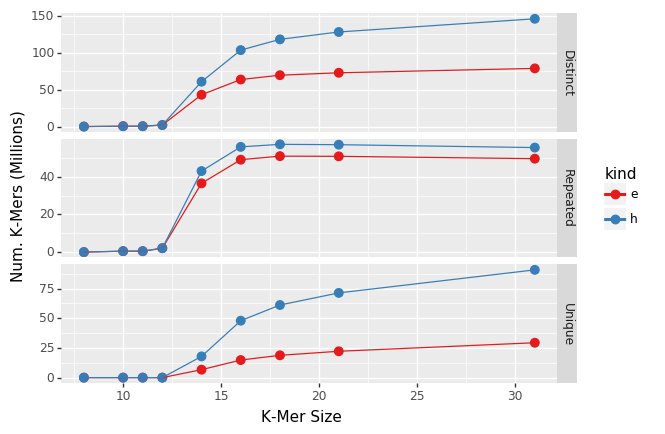

<ggplot: (-9223363289186372899)>

In [75]:
(
    ggplot(tbl, aes(x='k', y='value', color='kind')) +
        geom_point(size=3) +
        geom_line() +
        scale_color_brewer(type='qualitative', palette=6, direction=1) +
        facet_grid('variable~.', scales='free_y') +
        ylab('Num. K-Mers (Millions)') +
        xlab('K-Mer Size')

)